In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
from image_loader import dir_loader_stack
from image_loader import csv_loader_stack
from image_loader import image_plot
from image_loader import val_train_split

# Model classes
from resnet50 import Resnet50_pretrained

# Model helpers
from model_helpers import train
from model_helpers import predict
from model_helpers import plot_train_history

# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

In [ ]:
#tes cell

### Data From CSV Example

In [2]:
# Labels from CSV

df_lab = pd.read_csv('../datasets/animals/labels.csv')
test_df = pd.read_csv('../datasets/test_animals/test_labels.csv')

In [3]:
df_lab.Label = pd.Categorical(pd.factorize(df_lab.Label)[0])
test_df.Label = pd.Categorical(pd.factorize(test_df.Label)[0])


In [4]:
df_lab.shape

(2850, 2)

In [5]:
test_df.shape

(150, 2)

In [6]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = '../datasets/animals/'
test_data_dir = '../datasets/test_animals/'

In [7]:
# Create Train & Validation split

train_df, val_df = val_train_split(df_lab, 0.2)

Train Shape: (2280, 2)
Validation Shape: (570, 2)


In [8]:
train_df

,FilePath,Label
0,dogs/dogs_00062.jpg,1
1,cats/cats_00670.jpg,0
2,panda/panda_00827.jpg,2
3,panda/panda_00363.jpg,2
4,cats/cats_00861.jpg,0
...,...,...
2275,dogs/dogs_00758.jpg,1
2276,dogs/dogs_00215.jpg,1
2277,dogs/dogs_00250.jpg,1
2278,dogs/dogs_00414.jpg,1


In [9]:
val_df

,FilePath,Label
0,dogs/dogs_00697.jpg,1
1,cats/cats_00396.jpg,0
2,panda/panda_00240.jpg,2
3,dogs/dogs_00937.jpg,1
4,panda/panda_00328.jpg,2
...,...,...
565,cats/cats_00235.jpg,0
566,panda/panda_00524.jpg,2
567,cats/cats_00324.jpg,0
568,dogs/dogs_00903.jpg,1


In [10]:
test_df

,FilePath,Label
0,cat/cats_00001.jpg,0
1,cat/cats_00002.jpg,0
2,cat/cats_00003.jpg,0
3,cat/cats_00004.jpg,0
4,cat/cats_00005.jpg,0
...,...,...
145,panda/panda_00027.jpg,2
146,panda/panda_00028.jpg,2
147,panda/panda_00029.jpg,2
148,panda/panda_00030.jpg,2


In [11]:
train_loader = csv_loader_stack(data_dir,train_df, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

val_loader = csv_loader_stack(data_dir,val_df, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,False)

# test_loader = csv_loader_stack(test_data_dir,test_df, 'FilePath', 'Label',
#                         img_size,batch_size,num_workers,False)


loaders = {
    'train':train_loader,
    'valid':val_loader,
#     'test':test_loader,
}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


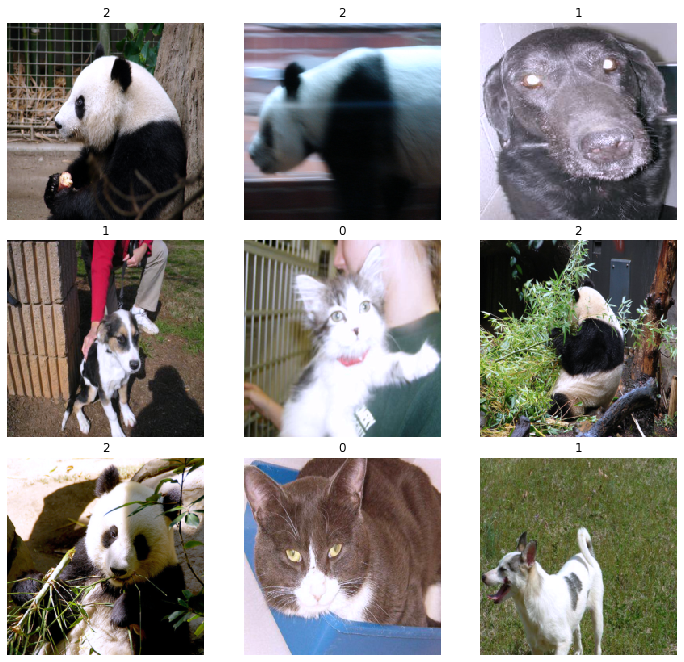

In [12]:
image_plot(train_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


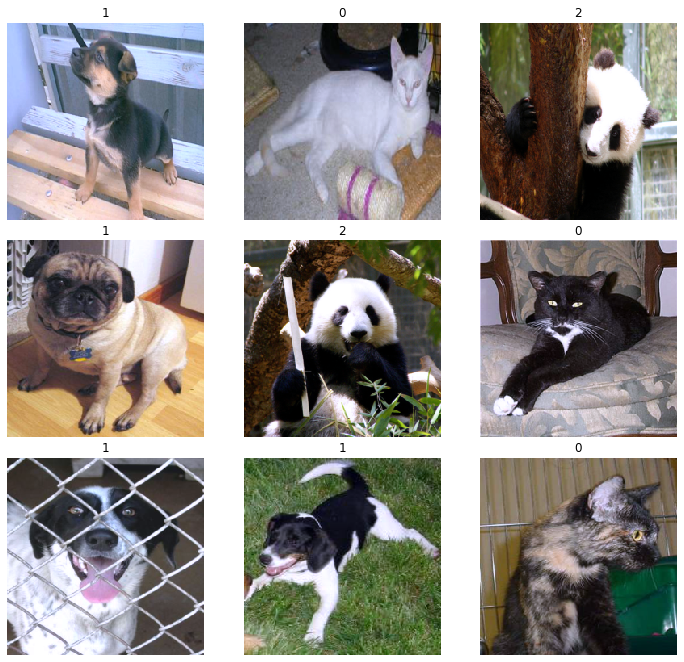

In [13]:
image_plot(val_loader)

In [15]:
# image_plot(test_loader)

### Create Model

In [16]:
# Model Parms

# Number Classes to predict
num_classes = 3

# Compute device (cuda = GPU)
device = 'cuda'

In [17]:
# create model from object

In [18]:
res_model = Resnet50_pretrained(num_classes)

In [19]:
# res_model = res_model.build()

### Train Model

In [20]:
# Train Params
n_epochs = 10
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [21]:
break

SyntaxError: 'break' outside loop (<ipython-input-21-6aaf1f276005>, line 4)

In [29]:
H = train(res_model.model, n_epochs, loaders, optimizer,
                    criterion, device, save_path)

./helpers\model_helpers.py:74: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],


Epoch #1, Batch #1 train_loss: 0.189918 train_acc: 0.96875
Epoch #1, Batch #51 train_loss: 0.150252 train_acc: 0.97549


./helpers\model_helpers.py:104: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  correct = torch.eq(torch.max(F.softmax(output), dim=1)[1],


Epoch: 1 val_loss: 0.116177 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.129637) val_acc: 0.982456
Epoch #2, Batch #1 train_loss: 0.134176 train_acc: 1.0
Epoch #2, Batch #51 train_loss: 0.138122 train_acc: 0.980392
Epoch: 2 val_loss: 0.105496 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.119537) val_acc: 0.989474
Epoch #3, Batch #1 train_loss: 0.110248 train_acc: 1.0
Epoch #3, Batch #51 train_loss: 0.133593 train_acc: 0.977941
Epoch: 3 val_loss: 0.100414 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.118386) val_acc: 0.985965
Epoch #4, Batch #1 train_loss: 0.082850 train_acc: 1.0
Epoch #4, Batch #51 train_loss: 0.126239 train_acc: 0.985907
Epoch: 4 val_loss: 0.093972 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.113275) val_acc: 0.980702
Epoch #5, Batch #1 train_loss: 0.157326 train_acc: 0.96875
Epoch #5, Batch #51 train_loss: 0.127134 train_acc: 0.976716
Epoch: 5 val_loss: 0.086849 val_acc: 1.000000
SAVE MODEL: val_loss decrease (0.111144) val_acc: 0.982456
Epoch #

### Train Logs

In [30]:
H

{'train_loss': [0.1512698382139206,
  0.1385139375925064,
  0.1296135038137436,
  0.12641876935958862,
  0.12522274255752563,
  0.1173558309674263,
  0.11656036972999573,
  0.11263800412416458,
  0.11333392560482025,
  0.11014074087142944],
 'train_acc': [0.9780701754385965,
  0.9815789473684211,
  0.9785087719298246,
  0.9837719298245614,
  0.9785087719298246,
  0.9815789473684211,
  0.9815789473684211,
  0.9833333333333333,
  0.9789473684210527,
  0.9802631578947368],
 'val_loss': [0.12963667511940002,
  0.11953742057085037,
  0.11838612705469131,
  0.11327502876520157,
  0.11114360392093658,
  0.10585260391235352,
  0.09958530217409134,
  0.09560678899288177,
  0.09113121777772903,
  0.09383135288953781],
 'val_acc': [0.9824561403508771,
  0.9894736842105263,
  0.9859649122807017,
  0.980701754385965,
  0.9824561403508771,
  0.980701754385965,
  0.9859649122807017,
  0.9842105263157894,
  0.987719298245614,
  0.9842105263157894]}

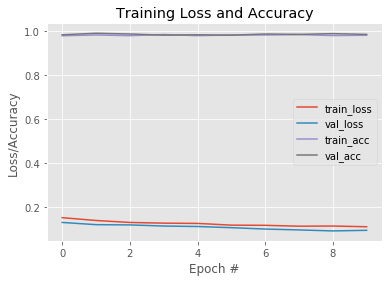

In [31]:
plot_train_history(H,n_epochs)

### Save Model

In [ ]:
res_model.save('test_save_method2.pt')

### Load Model


In [ ]:
# TODO Create model method
res_model.load('test_train.pt',True)

### Test Model

In [32]:
# get images image folder
cats = glob.glob("../datasets/test_animals/cat/*")
dogs = glob.glob("../datasets/test_animals/dog/*")
pandas = glob.glob("../datasets/test_animals/panda/*")

In [37]:
for image in cats:
    predict(res_model.model,image,device)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [38]:
for image in dogs:
    predict(res_model.model,image,device)

1
0
0
1
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
1
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
0
1
1
1
1


In [39]:
for image in pandas:
    predict(res_model.model,image,device)

0
2
2
2
0
2
0
2
0
2
2
2
0
0
0
0
0
2
2
2
2
0
2
2
2
2
0
0
0
2
2
0
2
0


In [ ]:
# Deploy Model

